✅ Total images found: 5712
🧾 Class distribution:
 class
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64
Found 3883 validated image filenames belonging to 4 classes.
Found 686 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


E0000 00:00:1754372429.753108      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754372429.949449      97 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


109/122 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.6804 - loss: 0.7841

E0000 00:00:1754372491.424617      94 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1754372491.620211      94 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


122/122 ━━━━━━━━━━━━━━━━━━━━ 138s 620ms/step - accuracy: 0.6955 - loss: 0.7509 - val_accuracy: 0.6706 - val_loss: 0.9849
Epoch 2/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 51s 418ms/step - accuracy: 0.9255 - loss: 0.2172 - val_accuracy: 0.7522 - val_loss: 0.6867
Epoch 3/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 52s 423ms/step - accuracy: 0.9541 - loss: 0.1264 - val_accuracy: 0.7332 - val_loss: 0.8781
Epoch 4/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 52s 422ms/step - accuracy: 0.9721 - loss: 0.0821 - val_accuracy: 0.8601 - val_loss: 0.4903
Epoch 5/5
122/122 ━━━━━━━━━━━━━━━━━━━━ 52s 429ms/step - accuracy: 0.9770 - loss: 0.0608 - val_accuracy: 0.9096 - val_loss: 0.2602


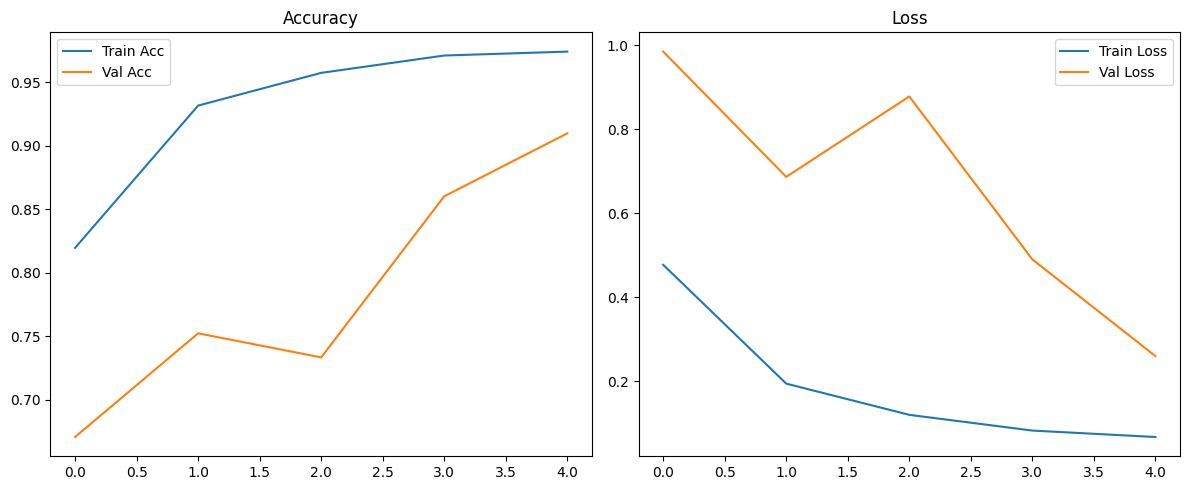

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.9144 - loss: 0.2740
✅ Test Accuracy (Keras): 0.9160
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step

Classification Report:
               precision    recall  f1-score   support

      glioma       0.97      0.91      0.94       264
  meningioma       0.76      0.98      0.85       268
     notumor       0.99      0.93      0.96       319
   pituitary       0.99      0.85      0.92       292

    accuracy                           0.92      1143
   macro avg       0.93      0.92      0.92      1143
weighted avg       0.93      0.92      0.92      1143



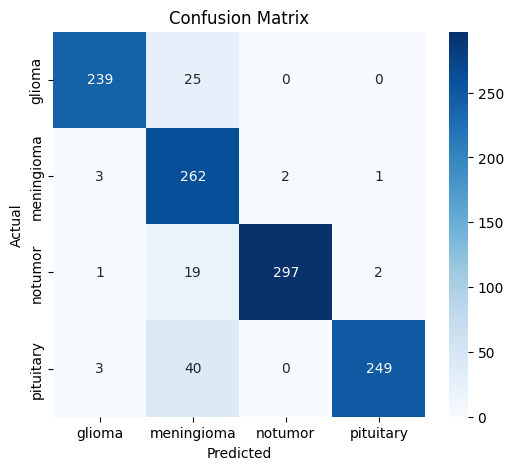


🎯 Overall Test Accuracy (manual calc): 91.60%


In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ⚙️ Parameters
DATASET_PATH = "/kaggle/input/brain-tumar-mri-datset-kaggle-7000-images/Training"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5  # You can increase this
NUM_CLASSES = 4

# 🧠 Step 1: Load image paths and labels
image_paths, labels = [], []
class_dirs = sorted([d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))])
for class_dir in class_dirs:
    class_path = os.path.join(DATASET_PATH, class_dir)
    for fname in os.listdir(class_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(class_path, fname))
            labels.append(class_dir)

df = pd.DataFrame({'filename': image_paths, 'class': labels})
print(f"✅ Total images found: {len(df)}")
print("🧾 Class distribution:\n", df['class'].value_counts())

# 🧪 Step 2: Split dataset
train_df, test_df = train_test_split(df, stratify=df['class'], test_size=0.20, random_state=42)
train_df, val_df = train_test_split(train_df, stratify=train_df['class'], test_size=0.15, random_state=42)

# 🔄 Step 3: Data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(train_df, x_col='filename', y_col='class',
                                              target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                              class_mode='categorical')
val_gen = valid_datagen.flow_from_dataframe(val_df, x_col='filename', y_col='class',
                                            target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                            class_mode='categorical')
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='filename', y_col='class',
                                            target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                            class_mode='categorical', shuffle=False)

# 🔧 Step 4: Build model using MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
preds = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

# ⚙️ Step 5: Compile model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📦 Step 6: Callbacks
checkpoint = ModelCheckpoint('mobilenetv2_best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
earlystop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 🏋️ Step 7: Train model
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=EPOCHS,
                    callbacks=[checkpoint, earlystop])

# 📈 Step 8: Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# 🧪 Step 9: Evaluate on test set
loss, acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy (Keras): {acc:.4f}")

# 🧾 Step 10: Classification report and confusion matrix
y_true = test_gen.classes
y_pred = np.argmax(model.predict(test_gen), axis=1)
class_labels = list(test_gen.class_indices.keys())

print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ✅ Step 11: Overall Accuracy (manual)
overall_accuracy = accuracy_score(y_true, y_pred)
print(f"\n🎯 Overall Test Accuracy (manual calc): {overall_accuracy * 100:.2f}%")
